In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv('auto-mpg.csv',sep=',')
df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
297,25.4,5,183.0,77,3530,20.1,79,2,mercedes benz 300d
321,32.2,4,108.0,75,2265,15.2,80,3,toyota corolla
216,31.5,4,98.0,68,2045,18.5,77,3,honda accord cvcc
277,16.2,6,163.0,133,3410,15.8,78,2,peugeot 604sl
239,30.0,4,97.0,67,1985,16.4,77,3,subaru dl


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


Пропусков не обнаружено

In [4]:
df=df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


дубликатов также не обнаружено

In [5]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


аномальных значений также нет

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


mpd - тип данных  float64, шкала: Непрерывная
cylinders -тип данных: int64, шкала: дискретная 
displacement - тип данных: float64, шкала: непрерывная
horsepower - тип данных: object, но его необходимо перевести в float64, после этого шкала станет: дискретная
weight - тип данных: int64, шкала: непрерывная
acceleration - тип данных: float64, шкала: непрерывная
model year - тип данных: int64, шкала: дискретная
origin - тип данных: int64, шкала: дискретная
car name - тип данных: object, шкала: категориальная

In [7]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [8]:
question_mark_count = (df['horsepower'] == '?').sum()
question_mark_count

6

In [9]:
df['horsepower'] = df['horsepower'].replace('?', '0')

In [10]:
df['horsepower'] = df['horsepower'].astype(int)

In [11]:
mean_horsepower = df[df['horsepower'] != 0]['horsepower'].mean()
df['horsepower'] = df['horsepower'].replace(0, mean_horsepower)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


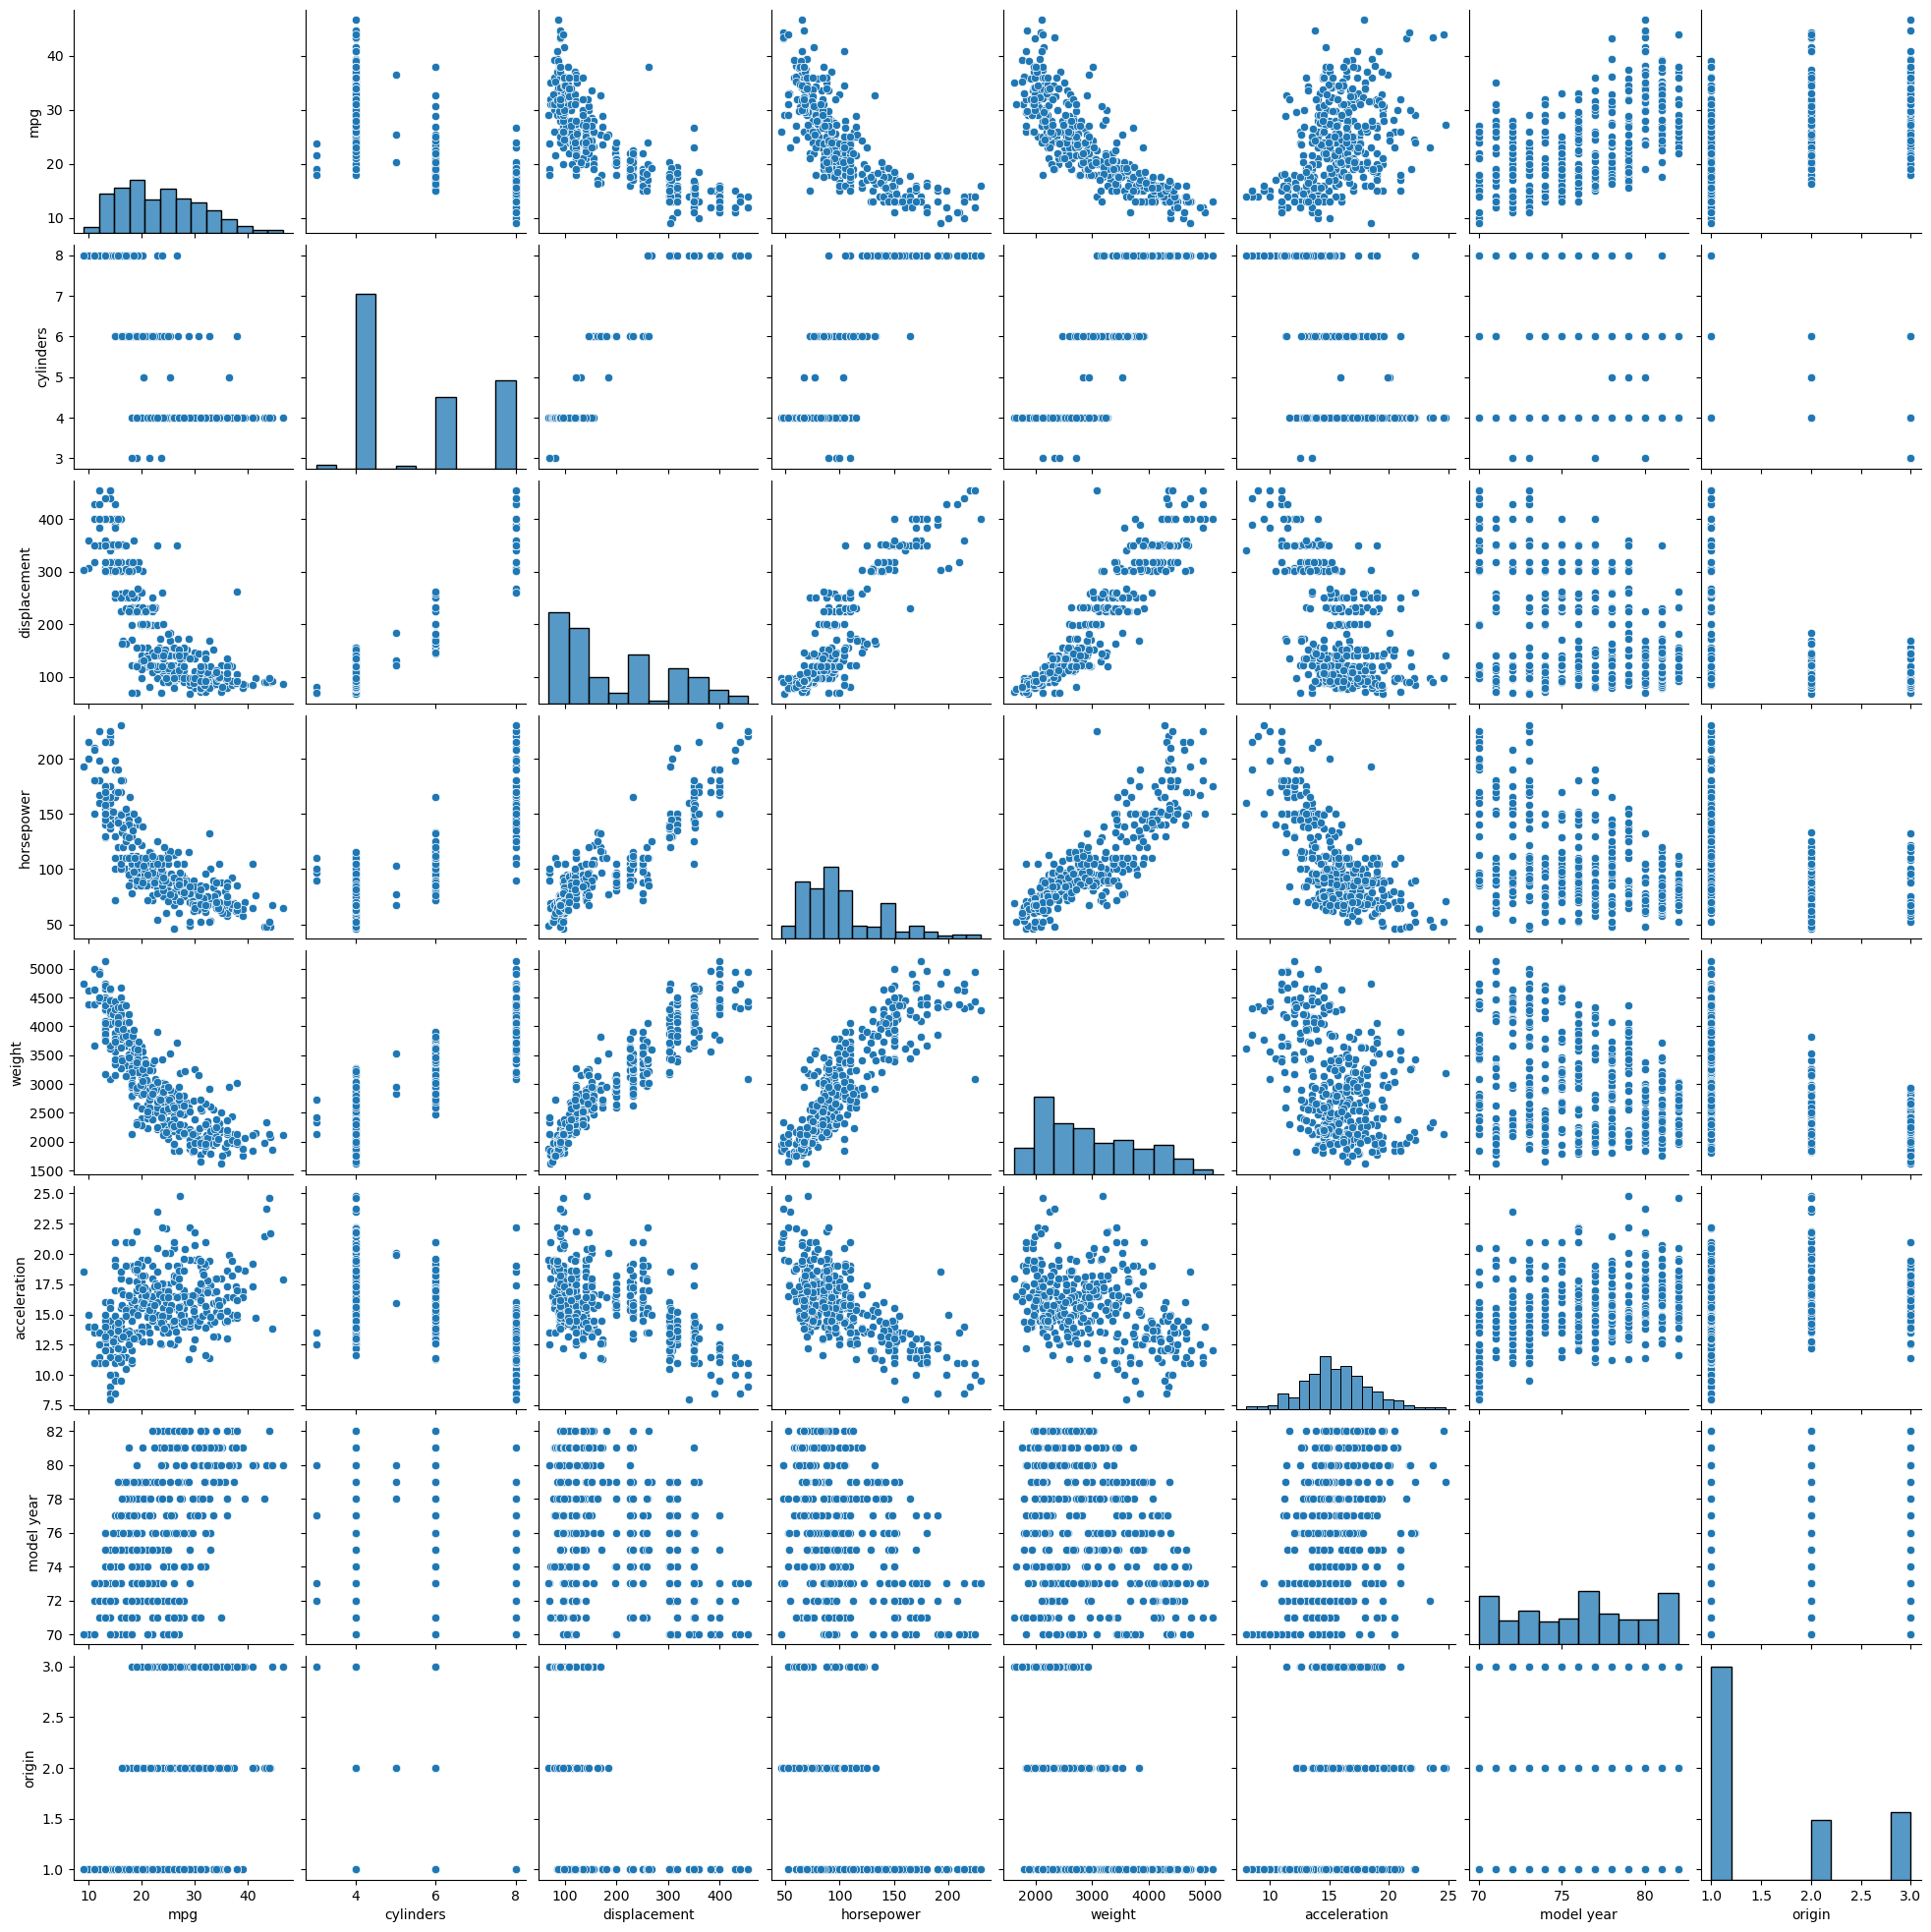

In [13]:
import seaborn as sns
col = ['mpg','cylinders', 'displacement', 'horsepower', 'weight', 'acceleration','model year','origin']
sns.pairplot(df.loc[:,col])

Гипотеза Н0: наблюдаемая выборка принадлежит нормальной генеральной совокупности, уровень значимости полагаем равным 0,05, так как выборка до 5000 наблюдений, то импользуем проверку нормальности по критерию Шапиро-Уилка

In [14]:
import scipy.stats as stats
Norm = pd.DataFrame(columns=['p-value','Norm'], index=col)
for c in col:
  Norm.at[c,'p-value']=stats.shapiro(df[c])[1]
  if stats.shapiro(df[c])[1]>0.05:
    Norm.at[c,'Norm']='Normal'
  else:
    Norm.at[c,'Norm']='Unknoun'
Norm

,p-value,Norm
mpg,0.0,Unknoun
cylinders,0.0,Unknoun
displacement,0.0,Unknoun
horsepower,0.0,Unknoun
weight,0.0,Unknoun
acceleration,0.039869,Unknoun
model year,0.0,Unknoun
origin,0.0,Unknoun


Есть основания отклонить нулевую гипотезу. Получили что ни один из признаков не распределен нормально

In [15]:
df['car name'].describe()

count            398
unique           305
top       ford pinto
freq               6
Name: car name, dtype: object

In [16]:
df['car name'].value_counts(normalize=True)

car name
ford pinto             0.015075
toyota corolla         0.012563
amc matador            0.012563
ford maverick          0.012563
chevrolet chevette     0.010050
                         ...   
chevrolet monza 2+2    0.002513
ford mustang ii        0.002513
pontiac astro          0.002513
amc pacer              0.002513
chevy s-10             0.002513
Name: proportion, Length: 305, dtype: float64

Данный признак нельзя никак перевести в некатегориальный, также нельзя объединить малопредставленные значения в один, так как все значения встречаются редко, в построение модели этот признак не берем 

In [17]:
df[col].corr(method='pearson')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,-0.453669
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.453669,-0.581024,0.205873,0.180662,1.000000


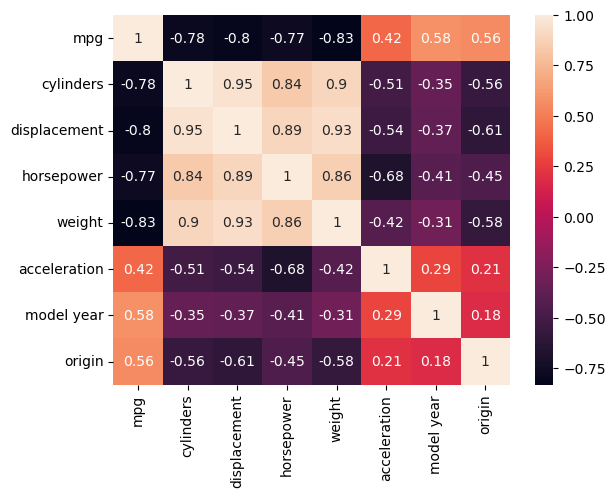

In [18]:
sns.heatmap(df[col].corr(),annot=True);

Видим, что между признаками: cylinders, displacement, horsepower,weight сильная корреляция, поэтому в модель возьмем только один из них. Также разумно взять признак  model year имеющий заметную корреляцию с mpg 

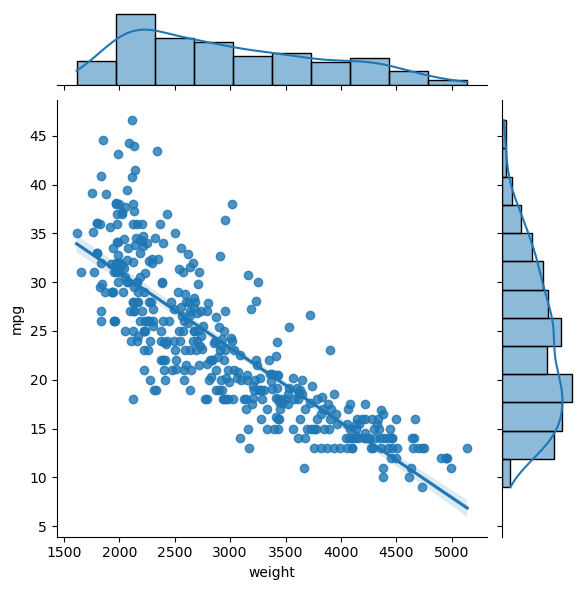

In [19]:
sns.jointplot(x = 'weight', y = 'mpg', data=df, kind="reg")

In [20]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [33]:
from sklearn.preprocessing import MinMaxScaler
numeric_columns = ['mpg', 'weight', 'model year']
df_numeric = df[numeric_columns]

# Инициализация нормализатора MinMaxScaler
scaler = MinMaxScaler()

# Нормализация числовых признаков
df_normalized = pd.DataFrame(scaler.fit_transform(df_numeric), columns=numeric_columns)

results1 = smf.ols('mpg ~ weight', data=df_normalized).fit() 
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     888.9
Date:                Sun, 30 Mar 2025   Prob (F-statistic):          2.97e-103
Time:                        00:16:04   Log-Likelihood:                 295.17
No. Observations:                 398   AIC:                            -586.3
Df Residuals:                     396   BIC:                            -578.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6632      0.011     60.549      0.000       0.642       0.685
weight        -0.7201      0.024    -29.814      0.000      -0.768      -0.673
==============================================================================
Omnibus:                       40.423   Durbin-Watson:                   0.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.695
Skew:                           0.713   Prob(JB):                     4.89e-13
Kurtosis:                       4.176   Cond. No.                         4.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Модель статистически занчима. Коэффициенты модели статистически значимы. Остатки не нормально распределены
Делаем вывод, что необходимы еще признаки, такм же возможно поможет логарифмирование признаков.

Пробуем логарифмирование:

In [34]:
df_normalized['mpg1']=np.log(df_normalized['mpg'])
df_normalized['weight1']=np.log(df_normalized['weight'])

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


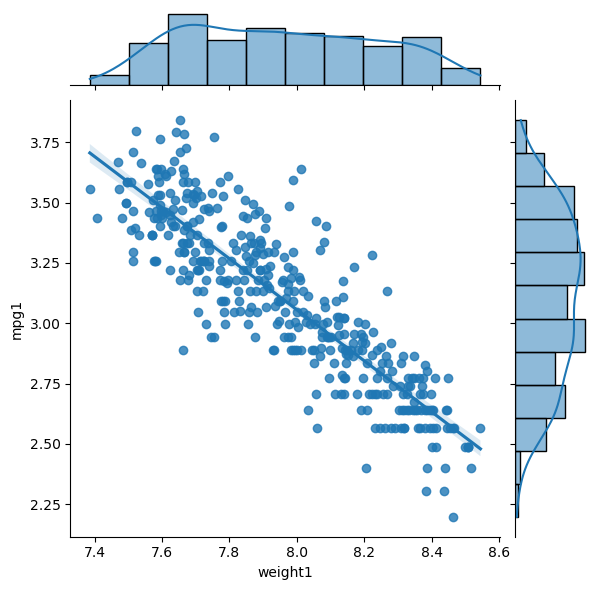

In [23]:
sns.jointplot(x = 'weight1',y = 'mpg1', data=df_normalized, kind="reg")

In [24]:
results2 = smf.ols('mpg1 ~ weight1', data=df).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   mpg1   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     1287.
Date:                Sat, 29 Mar 2025   Prob (F-statistic):          1.75e-126
Time:                        23:52:58   Log-Likelihood:                 153.46
No. Observations:                 398   AIC:                            -302.9
Df Residuals:                     396   BIC:                            -294.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.5219      0.235     49.056      0.000      11.060      11.984
weight1       -1.0583      0.029    -35.874      0.000      -1.116      -1.000
==============================================================================
Omnibus:                       10.762   Durbin-Watson:                   0.765
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               13.126
Skew:                           0.275   Prob(JB):                      0.00141
Kurtosis:                       3.699   Cond. No.                         230.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Модель значительно улучшилась. Модель статистически значима. Остатки ненормальны. Присутствует автокорреляция. Мултиколлинеарность отсутствует.

Для улучшения модели будем добавлять остальные признаки.

In [28]:
results3 = smf.ols('mpg1 ~ weight1 + acceleration', data=df).fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   mpg1   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     681.5
Date:                Sun, 30 Mar 2025   Prob (F-statistic):          8.66e-129
Time:                        00:01:41   Log-Likelihood:                 162.65
No. Observations:                 398   AIC:                            -319.3
Df Residuals:                     395   BIC:                            -307.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       10.8707      0.275     39.553      0.000      10.330      11.411
weight1         -1.0035      0.032    -31.837      0.000      -1.066      -0.942
acceleration     0.0139      0.003      4.320      0.000       0.008       0.020
==============================================================================
Omnibus:                        4.082   Durbin-Watson:                   0.801
Prob(Omnibus):                  0.130   Jarque-Bera (JB):                4.565
Skew:                           0.107   Prob(JB):                        0.102
Kurtosis:                       3.479   Cond. No.                         604.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Модель значима. Коэффициенты значимы. Мультиколлинеарность отсутствует. Остатки ненормальны. Присутствует автокорреляция.

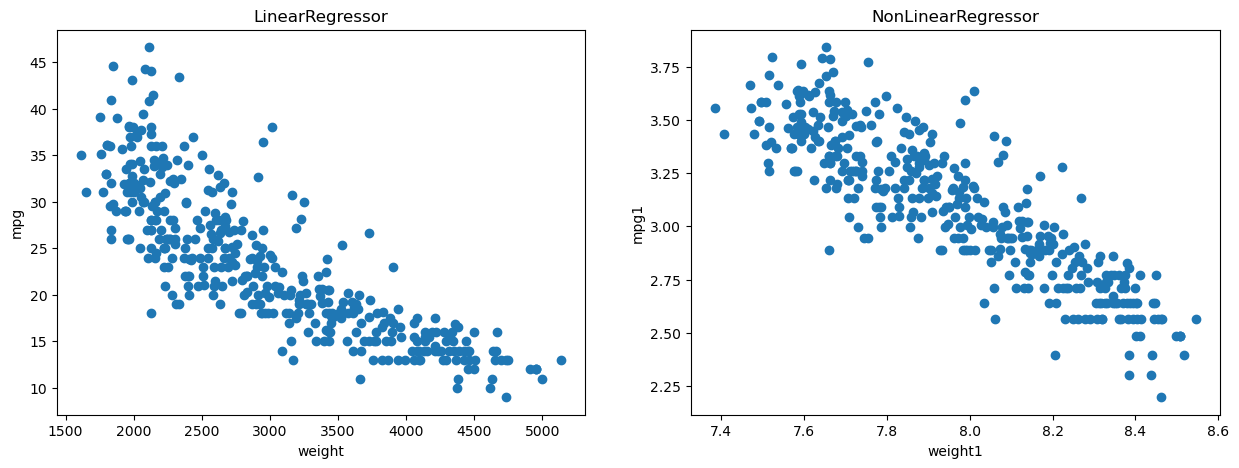

In [61]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(15, 5))

ax1.scatter(x=df['weight'], y=df['mpg'])
ax1.set_title('LinearRegressor')
ax1.set_xlabel('weight')
ax1.set_ylabel('mpg')

ax2.scatter(x=df['weight1'], y=df['mpg1'])
ax2.set_title('NonLinearRegressor')
ax2.set_xlabel('weight1')
ax2.set_ylabel('mpg1')

plt.show()

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

# **Линейная регрессия**

In [70]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
Y1=df['mpg'] 
X1=df[['weight','model year']] 
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.25, random_state = 0) #разбиение данных на обучающую и тестовую выборки

In [71]:
print('Number of data: ',df.shape[0])
print('Number of train data: ',X1_train.shape[0])
print('Number of test data: ',X1_test.shape[0])

Number of data:  398
Number of train data:  298
Number of test data:  100


In [73]:
import sklearn.linear_model as lm
LR = lm.LinearRegression()
model1 = LR.fit(X1_train,Y1_train)
model1.intercept_, model1.coef_

(-15.773266830924435, array([-0.00662058,  0.77382449]))

In [74]:
Y1_train_pred=model1.predict(X1_train)
Y1_test_pred=model1.predict(X1_test)

In [75]:
QualityMetrics=['R2 train','R2 test', 'MSE train','MSE test']
Models=pd.DataFrame(index=QualityMetrics)
Models.at[QualityMetrics,'LinearRegressor']=[r2_score(Y1_train,Y1_train_pred),
                                             r2_score(Y1_test,Y1_test_pred),
                                             mean_squared_error(Y1_train,Y1_train_pred),
                                             mean_squared_error(Y1_test,Y1_test_pred)]
Models

,LinearRegressor
R2 train,0.801271
R2 test,0.825302
MSE train,12.004628
MSE test,10.913281


# **Нелинейная регрессия**

In [77]:
Y2=df['mpg1']
X2=df[['weight1','model year']]
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.25, random_state = 0) #разбиение данных на обучающую и тестовую выборки
model2 = LR.fit(X2_train,Y2_train)
Y2_train_pred=model2.predict(X2_train)
Y2_test_pred=model2.predict(X2_test)
Models.at[QualityMetrics,'NonLinearRegressor']=[r2_score(Y2_train,Y2_train_pred),
                                                r2_score(Y2_test,Y2_test_pred),
                                                mean_squared_error(np.exp(Y2_train),np.exp(Y2_train_pred)),
                                                mean_squared_error(np.exp(Y2_test),np.exp(Y2_test_pred))]
Models

,LinearRegressor,NonLinearRegressor
R2 train,0.801271,0.878876
R2 test,0.825302,0.888793
MSE train,12.004628,8.957401
MSE test,10.913281,7.964113


# **Прогноз**

In [83]:
x_new_car = [[74,2600]]
y_new_car = model1.predict(x_new_car)
rounded_value = round(y_new_car[0], 2) 
Models.at['Forecast', 'LinearRegressor'] = rounded_value
print('Прогноз расхода топлива машины:', rounded_value)

Прогноз расхода топлива машины: 25.64


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [96]:
import math
x_new_car1 = [[np.log(2600),74]] 
y_new_car1=model2.predict(x_new_car1)
y_new_car1=math.exp(y_new_car1)
Models.at['Forecast','NonLinearRegressor']=round(y_new_car1,2)
print('Прогноз расхода топлива машины:',round(y_new_car1,2))

Прогноз расхода топлива машины: 22.58


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\User\AppData\Local\Temp\ipykernel_7228\1471937486.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_new_car1=math.exp(y_new_car1)


In [97]:
Models

,LinearRegressor,NonLinearRegressor
R2 train,0.801271,0.878876
R2 test,0.825302,0.888793
MSE train,12.004628,8.957401
MSE test,10.913281,7.964113
Forecast,25.640000,22.580000


Вывод: по всем метрикам оказалась лучше модель нелинейной регрессии. NonLinearRegressor надежнее предсказывает расход топлива и рекомендуется для практического использования